In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec


In [2]:
def preprocess_text(text):
    tokens = word_tokenize(text)

    tokens = [token.lower() for token in tokens]

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    tokens = [token for token in tokens if token not in string.punctuation]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

In [3]:
with open('../data/labelled_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


In [4]:
for item in data:
    item['text_content'] = preprocess_text(item['text_content'])

In [5]:
with open('../data/updated_json_file.json', 'w') as file:
    json.dump(data, file, indent=2)

In [6]:
with open('../data/updated_json_file.json', 'r') as file:
    data = json.load(file)

In [7]:
df = pd.DataFrame(data)

In [8]:
df

,text_content,sentiment,sentiment_score
0,"[hi, famili, session, last, week, use, wrinkl,...",positive,0.9513
1,"[hi, friend, head, iceland, shoot, northern, l...",positive,0.9201
2,"[hi, think, make, switch, lightroom, cloud, ri...",positive,0.9341
3,"[specif, exercis, tip, would, recommend, enhan...",positive,0.7778
4,"[peopl, still, hire, peopl, help, edit, photo,...",positive,0.9064
...,...,...,...
9375,[...],neutral,0.0000
9376,"[need, clear, tamron, 17-70, 2.8, soni, e-moun...",positive,0.6369
9377,"[hi, ask, groom, 's, mother, bring, ``, fanci,...",positive,0.9671
9378,"[big, time, photographi, fun, local, stuff, 's...",positive,0.9700


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert lists of tokens to space-separated strings
df['text_content_str'] = df['text_content'].apply(lambda x: ' '.join(x))
df


,text_content,sentiment,sentiment_score,text_content_str
0,"[hi, famili, session, last, week, use, wrinkl,...",positive,0.9513,hi famili session last week use wrinkl backdro...
1,"[hi, friend, head, iceland, shoot, northern, l...",positive,0.9201,hi friend head iceland shoot northern light lo...
2,"[hi, think, make, switch, lightroom, cloud, ri...",positive,0.9341,hi think make switch lightroom cloud right syn...
3,"[specif, exercis, tip, would, recommend, enhan...",positive,0.7778,specif exercis tip would recommend enhanc phot...
4,"[peopl, still, hire, peopl, help, edit, photo,...",positive,0.9064,peopl still hire peopl help edit photo littl b...
...,...,...,...,...
9375,[...],neutral,0.0000,...
9376,"[need, clear, tamron, 17-70, 2.8, soni, e-moun...",positive,0.6369,need clear tamron 17-70 2.8 soni e-mount stain...
9377,"[hi, ask, groom, 's, mother, bring, ``, fanci,...",positive,0.9671,hi ask groom 's mother bring `` fanci camera '...
9378,"[big, time, photographi, fun, local, stuff, 's...",positive,0.9700,big time photographi fun local stuff 's good c...


In [12]:
# Bag-of-Words (BoW) representation
bow_vectorizer = CountVectorizer()
bow_features = bow_vectorizer.fit_transform(df['text_content_str'])
print("Bag-of-Words features shape:", bow_features.shape)

Bag-of-Words features shape: (9380, 6465)


In [13]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['text_content_str'])
print("TF-IDF features shape:", tfidf_features.shape)


TF-IDF features shape: (9380, 6465)


In [14]:
tokenized_text = df['text_content_str'].apply(word_tokenize)
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)
word2vec_features = word2vec_model.wv.vectors
print("Word2Vec features shape:", word2vec_features.shape)


Word2Vec features shape: (7000, 100)


In [15]:
from sklearn.feature_extraction.text import HashingVectorizer

# Create an instance of HashingVectorizer
hash_vectorizer = HashingVectorizer(n_features=1000)

# Apply HashingVectorizer to the text data
hash_features = hash_vectorizer.transform(df['text_content_str'])

# Print the shape of the hash features
print("HashingVectorizer features shape:", hash_features.shape)

HashingVectorizer features shape: (9380, 1000)


In [16]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\nihal\Machine Learning Programming - Programs\Project\Sentiment-Analysis\venv\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [17]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.3.2


In [18]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# We will create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# We will apply TfidfVectorizer to the text data
tfidf_features = tfidf_vectorizer.fit_transform(df['text_content_str'])

# We will create an instance of NMF
nmf_model = NMF(n_components=10, random_state=42)

# Now, we will Fit the NMF model to the TF-IDF features
nmf_model.fit(tfidf_features)

# We will print the top words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic #{topic_idx + 1}: {' '.join(top_words)}")

Topic #1: photo famili use share take took one photograph could taken
Topic #2: com http www reddit wiki photography buy 3f faq ___
Topic #3: print sell printer qualiti local websit ship size art servic
Topic #4: imag edit raw lightroom color look use one file set
Topic #5: share discord thread prompt discus critiqu commun forget feedback set
Topic #6: photographi look good book photograph peopl find portrait interest get
Topic #7: shoot client work ask charg time day get photograph hour
Topic #8: light flash shoot use set iso night tip dark studio
Topic #9: len camera lens use focal nikon 50mm 70 canon film
Topic #10: pictur take camera idea want video put like pic tri


In [21]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
count_vectorizer = CountVectorizer()

# Apply CountVectorizer to the text data
count_features = count_vectorizer.fit_transform(df['text_content_str'])

# Create an instance of LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit the LDA model to the count features
lda_model.fit(count_features)

# Print the top words for each topic
feature_names = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    print(f"Topic #{topic_idx + 1}: {' '.join(top_words)}")

Topic #1: photo want get would take like look know photographi photograph
Topic #2: len would light use shoot photo like focal get work
Topic #3: photo edit use look print imag like one set color
Topic #4: http com www reddit buy photography wiki camera question 3f
Topic #5: photo like photograph use photographi camera would want take work
Topic #6: photo erwitt pictur camera like use post photograph want take
Topic #7: photographi would use photograph want get like peopl work go
Topic #8: shoot photo flash print would photograph camera like get pictur
Topic #9: like photo shoot get use photographi photograph imag would good
Topic #10: photo get camera use tri take look like photograph would


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


In [23]:
X = df['text_content_str']
y = df['sentiment']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [26]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [27]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
for label, encoded_label in label_mapping.items():
    print(f"{label} --> {encoded_label}")

Label Mapping:
negative --> 0
neutral --> 1
positive --> 2


In [28]:
models = [SVC(kernel='linear', random_state=42),XGBClassifier(),LogisticRegression(), RandomForestClassifier(),MultinomialNB()]
accuracy=[]
class_reports =[]
for model in models:
    model.fit(X_train_tfidf, y_train_encoded)

    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test_encoded, y_pred)
    class_rep = classification_report(y_test_encoded, y_pred)
    accuracy.append(acc)
    class_reports.append(class_rep)

    print(f'{model.__class__.__name__} Accuracy: {acc:.2f}')
    print(f'{model.__class__.__name__} Classification Report:\n {class_rep}\n \n')


SVC Accuracy: 1.00
SVC Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       1.00      0.93      0.97        75
           2       1.00      1.00      1.00      1502

    accuracy                           1.00      1876
   macro avg       1.00      0.98      0.99      1876
weighted avg       1.00      1.00      1.00      1876

 

XGBClassifier Accuracy: 1.00
XGBClassifier Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00      1502

    accuracy                           1.00      1876
   macro avg       1.00      1.00      1.00      1876
weighted avg       1.00      1.00      1.00      1876

 

LogisticRegression Accuracy: 0.99
LogisticRegression Classification Report:
               precision    recall  f1-sco

In [30]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for SVC
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear']}

# Create SVC model
svc_model = SVC(random_state=42)

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svc_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train_encoded)

# Get the best model from the grid search
best_svc_model = grid_search.best_estimator_

In [31]:
best_svc_model

SVC(C=10, gamma=1, kernel='linear', random_state=42)

In [32]:
best_svc_model = grid_search.best_estimator_


In [33]:
y_pred = best_svc_model.predict(X_test_tfidf)

# Evaluate the model
acc = accuracy_score(y_test_encoded, y_pred)
class_rep = classification_report(y_test_encoded, y_pred)

In [34]:
print(class_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00      1502

    accuracy                           1.00      1876
   macro avg       1.00      1.00      1.00      1876
weighted avg       1.00      1.00      1.00      1876



In [35]:
import joblib

joblib.dump(svc_model, '../data/svc_model.joblib')


['../data/svc_model.joblib']

In [36]:
preprocessed_new_data = preprocess_text("If he was to reproduce at all it would be asexually in a puddle of toxic bile, regurgitating some pure fucking homunculus of everything that is wrong with the world.")

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
max_words = 10000
max_len = 100

In [40]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [41]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [42]:
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')


In [43]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [44]:
embedding_dim = 50

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=3, activation='softmax'))

In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [46]:
epochs = 5
batch_size = 32

model.fit(X_train_padded, y_train_encoded, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# Evaluate the model on the test set
y_pred_probs  = model.predict(X_test_padded)
y_pred = y_pred_probs.argmax(axis=-1)
acc = accuracy_score(y_test_encoded, y_pred)
class_rep = classification_report(y_test_encoded, y_pred)

Epoch 1/5


212/212 [==============================] - 28s 111ms/step - loss: 0.6354 - accuracy: 0.7928 - val_loss: 0.5865 - val_accuracy: 0.7989
Epoch 2/5
212/212 [==============================] - 23s 111ms/step - loss: 0.5605 - accuracy: 0.8090 - val_loss: 0.5116 - val_accuracy: 0.8282
Epoch 3/5
212/212 [==============================] - 23s 111ms/step - loss: 0.5073 - accuracy: 0.8239 - val_loss: 0.3972 - val_accuracy: 0.8349
Epoch 4/5
212/212 [==============================] - 24s 113ms/step - loss: 0.4423 - accuracy: 0.8590 - val_loss: 0.4474 - val_accuracy: 0.8655
Epoch 5/5
59/59 [==============================] - 2s 19ms/step


In [47]:
acc 

0.8976545842217484

In [48]:
# Define hyperparameters to experiment with
units_list = [50, 100, 150]
dropout_list = [0.2, 0.3, 0.4]
recurrent_dropout_list = [0.2, 0.3, 0.4]
optimizer_list = ['adam', 'rmsprop']

In [49]:
best_accuracy = 0
best_params = {}

In [50]:
for units in units_list:
    for dropout in dropout_list:
        for recurrent_dropout in recurrent_dropout_list:
            for optimizer in optimizer_list:
                # Build the model
                model = Sequential()
                model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
                model.add(LSTM(units=units, dropout=dropout, recurrent_dropout=recurrent_dropout))
                model.add(Dense(units=3, activation='softmax'))
                model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                # Train the model
                model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1, verbose=0)

                # Evaluate on the test set
                y_pred_probs = model.predict(X_test_padded)
                y_pred = y_pred_probs.argmax(axis=-1)
                accuracy = accuracy_score(y_test_encoded, y_pred)

                # Check if this set of hyperparameters gives better accuracy
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'units': units, 'dropout': dropout, 'recurrent_dropout': recurrent_dropout, 'optimizer': optimizer}
                    best_model = model


59/59 [==============================] - 6s 74ms/step


KeyboardInterrupt: 

In [69]:
y_pred_probs = best_model.predict(X_test_padded)
y_pred = y_pred_probs.argmax(axis=-1)
acc = accuracy_score(y_test_encoded, y_pred)
class_rep = classification_report(y_test_encoded, y_pred)

3/3 [==============================] - 0s 25ms/step


C:\Users\nihal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nihal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nihal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [70]:
print("Best Parameters:", best_params)
print("Test Accuracy:", acc)
print("Classification Report:\n", class_rep)

Best Parameters: {'units': 50, 'dropout': 0.2, 'recurrent_dropout': 0.2, 'optimizer': 'adam'}
Test Accuracy: 0.45121951219512196
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.07      0.14        27
           1       0.00      0.00      0.00        20
           2       0.44      1.00      0.61        35

    accuracy                           0.45        82
   macro avg       0.48      0.36      0.25        82
weighted avg       0.52      0.45      0.31        82



In [71]:
best_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 50)           500000    
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 520353 (1.98 MB)
Trainable params: 520353 (1.98 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import numpy as np

y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

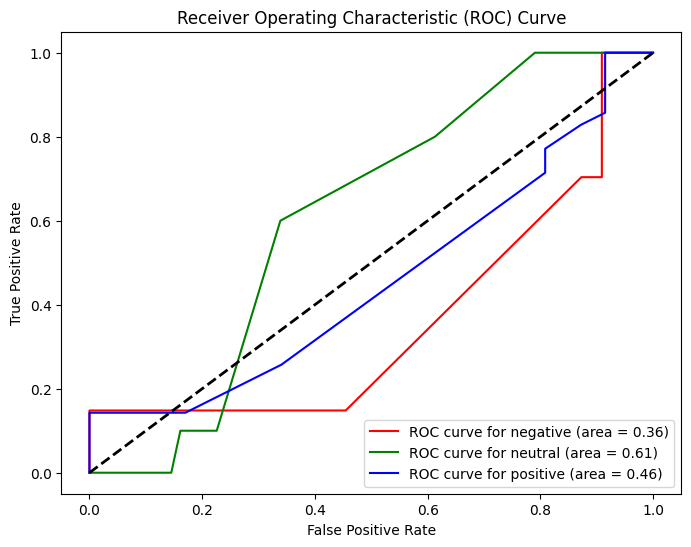

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']  # Adjust the colors based on the number of classes

for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f'ROC curve for {label_encoder.classes_[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [74]:
new_data = ["If he was to reproduce at all it would be asexually in a puddle of toxic bile, regurgitating some pure fucking homunculus of everything that is wrong with the world."]  # Replace this with your actual new text data
new_data_sequences = tokenizer.texts_to_sequences(new_data)
new_data_padded = pad_sequences(new_data_sequences, maxlen=max_len, padding='post', truncating='post')

# Predict sentiment for the new data
new_data_pred_probs = best_model.predict(new_data_padded)
new_data_pred = new_data_pred_probs.argmax(axis=-1)

# Decode predicted labels using the label encoder
predicted_labels = label_encoder.inverse_transform(new_data_pred)

print("Predicted Sentiment:", predicted_labels)

1/1 [==============================] - 0s 41ms/step
Predicted Sentiment: ['positive']


In [75]:
new_data_tfidf = tfidf_vectorizer.transform(preprocessed_new_data)


In [76]:
predictions = best_svc_model.predict(new_data_tfidf)


In [77]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [78]:
sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}


In [79]:
predicted_labels = [sentiment_mapping[prediction] for prediction in predictions]


In [80]:
predicted_labels

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral']

In [81]:
from collections import Counter

In [82]:
label_counts = Counter(predicted_labels)


In [83]:
total_count = len(predicted_labels)
average_sentiment = sum([count * index for index, count in enumerate(label_counts.values())]) / total_count


In [84]:
print("Label Counts:", label_counts)
print("Average Sentiment:", average_sentiment)

Label Counts: Counter({'neutral': 13})
Average Sentiment: 0.0
